# Taller 5. Redes Convolucionales
Nombres: Manuel Sanchez y Allan Ramirez

## Parte I

En este ejercicio utilizaremos redes convolucionales para el problema de reconocimiento de digitos de MNIST. Como nuestro input en este caso sera procesado como una imagen (una matriz) y no como un vector podemos importarlo y procesarlo usando:

In [2]:
from tensorflow.keras.datasets import mnist

(train_images , train_labels), (test_images , test_labels) = mnist.load_data ()
train_images = train_images.reshape ((60000 , 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape ((10000 , 28, 28, 1))
test_images = test_images.astype("float32") / 255

Ya habiendo importado nuestros datos podemos construir nuestra primera red convolucional usando:

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape =(28, 28, 1))
x = layers.Conv2D(filters =32, kernel_size =3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size =2)(x)
x = layers.Flatten ()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs , outputs=outputs)

Como podra ver, hemos definido nuestra red sin usar el API secuencial. Por el contrario, hemos definido la red capa por capa utilizando la funcion “layers” incluyendo al final como parametro la capa anterior. La accion de “layers” es como dibujar una flecha desde la capa que se recibe como parametro hasta esta capa que creo.

a) Utilice model.summary() para describir la red que creo. Describa sus observaciones.

In [4]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

Este resumen describe cómo se creó y estructuró esta red neuronal convolucional, especificando el tipo de red, las dimensiones de entrada y salida de cada capa, y la cantidad de parámetros que se estiman para que la red aprenda. A continuación, se describe cada capa en detalle:

Capa de Entrada (Input Layer): La primera capa de la red tiene una entrada de tamaño 28×28. Esta capa prepara las imágenes para que la red pueda procesarlas y aprender de ellas.

Capa Convolucional 2D (Conv2D Layer): Esta capa realiza operaciones de convolución en las imágenes. Genera una salida de tamaño 26×26 al aplicar 32 filtros, lo que permite capturar características específicas de las imágenes. La capa usa 320 parámetros, los cuales se entrenan para extraer patrones relevantes en los datos de entrada.

Capa de MaxPooling 2D: En esta capa se reduce la dimensionalidad de los datos mediante una operación de agrupamiento, obteniendo una salida de tamaño 13×13. Mantiene los 32 mapas de características, lo que ayuda a reducir la complejidad del modelo sin perder información importante.

Capa de Flatten: Convierte la salida 3D de la capa de MaxPooling en un vector 1D de 5,408 elementos, preparándola para las capas completamente conectadas que siguen. Esta capa facilita que los datos pasen a las capas densas para la clasificación final.

Capa Densa (Dense Layer): La última capa es una capa densa o completamente conectada con 10 neuronas, donde cada neurona representa una clase de predicción. Esta capa permite asociar los patrones aprendidos en las capas anteriores con las posibles clases de salida (por ejemplo, los dígitos del 0 al 9 en el caso de reconocimiento de dígitos).

El modelo completo tiene un total de 54,410 parámetros, todos entrenables, lo que significa que cada parámetro se ajusta durante el entrenamiento

b) Pruebe el modelo definido arriba para sus datos de prueba. Utilice sparse_categorical_crossentropy como funcion de costo/p ́erdida. Describa sus observaciones ¿Cual es el mejor desempeno que logra con su red?

In [5]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, batch_size=32, validation_data=(test_images, test_labels))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.8828 - loss: 0.4047 - val_accuracy: 0.9740 - val_loss: 0.0854
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9745 - loss: 0.0877 - val_accuracy: 0.9765 - val_loss: 0.0771
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9822 - loss: 0.0610 - val_accuracy: 0.9788 - val_loss: 0.0648
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9849 - loss: 0.0514 - val_accuracy: 0.9804 - val_loss: 0.0548
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9873 - loss: 0.0411 - val_accuracy: 0.9844 - val_loss: 0.0479
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9894 - loss: 0.0369 - val_accuracy: 0.9825 - val_loss: 0.0533
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9915 - loss: 0.0280 - val_accuracy: 0.9847 - val_loss: 0.0474
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9930 - loss: 0.0248 -

KeyboardInterrupt: 

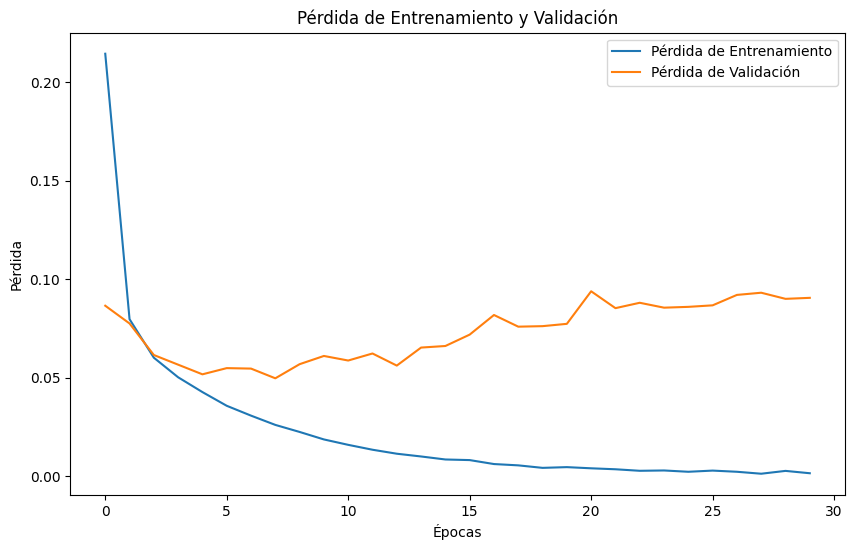

In [ ]:
import matplotlib.pyplot as plt

# Graficar la pérdida de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Pérdida de Entrenamiento')
plt.plot(val_loss, label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida de Entrenamiento y Validación')
plt.legend()
plt.show()

Esta grafica nos ayuda a detectar posibles problemas de sobreajuste para determinar que tan alejado ese valor de perdida con el entrenamiento y de validacion, aunque graficamente da parecer que la diferencia es amplio pero en general menor de 0.01 por lo que problemas de sobreajuste realmente la red no la tiene pero si escogieramos por rendimiento, por costo computacional, tambien por evitar problema de sobreajuste podriamos elegir los resultados hasta la epoca 7 que funciona de manera muy similar si trabajaramos con 30 epocas.

In [ ]:
train_loss_epoch = history.history['loss'][6]
val_loss_epoch = history.history['val_loss'][6]
train_accuracy_epoch = history.history['accuracy'][6]
val_accuracy_epoch = history.history['val_accuracy'][6]

print(f"Pérdida de Entrenamiento: {train_loss_epoch}")
print(f"Pérdida de Validación: {val_loss_epoch}")
print(f"Precisión de Entrenamiento: {train_accuracy_epoch}")
print(f"Precisión de Validación: {val_accuracy_epoch}")

Pérdida de Entrenamiento: 0.0307844877243042
Pérdida de Validación: 0.0546615794301033
Precisión de Entrenamiento: 0.9908666610717773
Precisión de Validación: 0.9825000166893005


Observando los resultados vemos que la diferencia entre los valores de perdida son bajos y para la precision de entrenamiento como validacion podemos identficar que realmente la red se encuentra muy bien entrenada y que la prediciones llegan a ser bastante precisas

c) (15 ptos) Divida de su conjunto de prueba en 2 para disponer de un conjunto de validacion. Incluya un par de capas convolucionales (con sus respectivas capas de pooling) adicionales en su red y un par de capas densas antes del output. Experimente con los hiperparametros y describa sus mejores resultados (su mejor red deberıa superar el 98.5% - 99% de acierto).

In [ ]:
# Función para crear el modelo
def create_model(filters):
    inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(filters=filters[0], kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)

    x = layers.Conv2D(filters=filters[1], kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)

    x = layers.Conv2D(filters=filters[2], kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)

    outputs = layers.Dense(10, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Filtros para diferentes modelos
filters_list = [
    [8, 8, 8],  # Modelo 1
    [16, 16, 16],  # Modelo 2
    [32, 32, 32],  # Modelo 3
    [64, 64, 64],  # Modelo 3
]

# Entrenamiento y evaluación de cada modelo
history_dict = {}

for i, filters in enumerate(filters_list):
    print(f"\nEntrenando el Modelo {i+1} con filtros {filters}")
    model = create_model(filters)
    
    # Entrenamiento
    history = model.fit(train_images, train_labels, epochs=7, batch_size=32, validation_data=(test_images, test_labels))
    
    # Guardar el historial
    history_dict[f"model_{i+1}"] = history
    
    # Evaluar el modelo
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print(f"Pérdida en el conjunto de prueba del Modelo {i+1}: {test_loss}")
    print(f"Precisión en el conjunto de prueba del Modelo {i+1}: {test_accuracy * 100:.2f}%")


Entrenando el Modelo 1 con filtros [8, 8, 8]
Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7170 - loss: 0.8591 - val_accuracy: 0.9295 - val_loss: 0.2282
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9256 - loss: 0.2369 - val_accuracy: 0.9432 - val_loss: 0.1849
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9449 - loss: 0.1791 - val_accuracy: 0.9468 - val_loss: 0.1720
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9530 - loss: 0.1543 - val_accuracy: 0.9596 - val_loss: 0.1346
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9569 - loss: 0.1355 - val_accuracy: 0.9613 - val_loss: 0.1225
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9607 - loss: 0.1233 - val_accuracy: 0.9647 - val_loss: 0.1124
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9620 - loss: 0.1179 - val_accuracy: 0.9657 - val_loss: 0.1150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accu

Comose expreso en el inciso del punto se agregaron las nuevas capas convollucionales y polling y tambien como las capas densas, con la diferencias que cada modelo manejas dentro de sus capas filtros diferentes entonces el modelo cada capa conlucionales manejo un filtro 8, 16, 32 y 64 respectivamente, entonces los resultados fueron los siguientes y como en el ejercicio anterior no dimos cuenta que dese la epoca 7 se entrena bien y no genere sobreajuste cada moleto tiene esa misma cantidad de epocas. Ahora bien mostremos los resultados:

Modelo 1: Precision del 96.57%
Modelo 2: Precision del 98.06%
Modelo 3: Precision del 98.48%
Modelo 4: Precision del 98.69%

Como podemos ver de los resultados es conforme vamos aumentando los filtros a utilizar en la capas convolucionales permite entender que ayuda a la red a ser precisa e igualmente estar pendiente en que momento este parametro puede estar teniendo problemas en cuanto a costo computacional o temas de sobreajuste.

d) Experimente con variantes del pooling utilizado (puede probar otros tamaños de ventana y utilizar tambien L2 pooling). Describa sus resultados.

In [ ]:
from tensorflow.keras import layers, models
from tensorflow import keras

# Función para crear el modelo con configuraciones de pooling
def create_model(pooling_type="max", pool_size=(2, 2)):
    inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(inputs)
    
    # Aplicación de pooling según el tipo seleccionado
    if pooling_type == "max":
        x = layers.MaxPooling2D(pool_size=pool_size)(x)
    elif pooling_type == "average":
        x = layers.AveragePooling2D(pool_size=pool_size)(x)
    elif pooling_type == "L2":
        # L2 pooling usando reducción de dimensiones (Root Mean Square con reducción)
        x = layers.Lambda(lambda x: keras.backend.sqrt(
            keras.backend.pool2d(keras.backend.square(x), pool_size=pool_size, pool_mode='avg')
        ))(x)
    
    # Segunda capa convolucional y pooling
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    if pooling_type == "max":
        x = layers.MaxPooling2D(pool_size=pool_size)(x)
    elif pooling_type == "average":
        x = layers.AveragePooling2D(pool_size=pool_size)(x)
    elif pooling_type == "L2":
        x = layers.Lambda(lambda x: keras.backend.sqrt(
            keras.backend.pool2d(keras.backend.square(x), pool_size=pool_size, pool_mode='avg')
        ))(x)
    
    # Tercera capa convolucional y pooling
    x = layers.Conv2D(filters=64, kernel_size=1, activation="relu")(x)
    if pooling_type == "max":
        x = layers.MaxPooling2D(pool_size=pool_size)(x)
    elif pooling_type == "average":
        x = layers.AveragePooling2D(pool_size=pool_size)(x)
    elif pooling_type == "L2":
        x = layers.Lambda(lambda x: keras.backend.sqrt(
            keras.backend.pool2d(keras.backend.square(x), pool_size=pool_size, pool_mode='avg')
        ))(x)
    
    # Capas densas y de salida
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    
    # Compilación del modelo
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Configuración de variantes de pooling
pooling_variants = [
    {"type": "max", "size": (2, 2)},
    {"type": "average", "size": (2, 2)},
    {"type": "L2", "size": (2, 2)},
]

# Lista para almacenar resultados
results = []

# Entrenamiento y evaluación de cada variante
for i, config in enumerate(pooling_variants):
    print(f"\nEntrenando modelo {i+1} con {config['type']} pooling y tamaño {config['size']}")
    model = create_model(pooling_type=config['type'], pool_size=config['size'])
    history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels), verbose=0)
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    results.append({"pooling_type": config['type'], "pool_size": config['size'], "loss": test_loss, "accuracy": test_accuracy})

# Mostrar resultados
for result in results:
    print(f"Pooling: {result['pooling_type']}, Tamaño: {result['pool_size']} -> Pérdida: {result['loss']:.4f}, Precisión: {result['accuracy']*100:.2f}%")



Entrenando modelo 1 con max pooling y tamaño (2, 2)

Entrenando modelo 2 con average pooling y tamaño (2, 2)

Entrenando modelo 3 con L2 pooling y tamaño (2, 2)

Pooling: max, Tamaño: (2, 2) -> Pérdida: 0.0589, Precisión: 98.18%
Pooling: average, Tamaño: (2, 2) -> Pérdida: 0.0702, Precisión: 97.75%
Pooling: L2, Tamaño: (2, 2) -> Pérdida: 2.3010, Precisión: 11.35%


Para este punto, trabajaremos con la misma arquitectura del punto anterior: tres capas convolucionales y dos capas densas. Sin embargo, en esta ocasión el número de filtros se fijará en 64 por capa, y lo que variará será el tipo de pooling utilizado para la reducción de dimensionalidad. Usaremos tres tipos de pooling:

MaxPooling (Máximo): Este fue el método utilizado inicialmente.
AveragePooling (Promedio): Calcula el promedio de los valores en la ventana de pooling.
L2 Pooling: Como no existe una función explícita en Keras para este tipo de pooling, implementaremos una función personalizada para simularlo, aplicando la raíz cuadrada de la media de los valores al cuadrado en la ventana.
Nota: Aunque no iteramos sobre el tamaño de la ventana en este experimento, incrementar el tamaño de la ventana reduce aún más la dimensionalidad de los datos. Sin embargo, un tamaño excesivo de la ventana podría afectar el rendimiento de la red, ya que puede eliminar demasiada información útil para el aprendizaje.

A continuación, se muestran los resultados de precisión obtenidos con cada tipo de pooling:

Modelo 1 (MaxPooling): Precisión 98.18%

Modelo 2 (AveragePooling): Precisión 97.75%

Modelo 3 (L2 Pooling): Precisión 11.35%

Como podemos ver el calculo del L2 pooling no resulta muy util para ejercicio aunque el AVerage Poolling resulta tambien util.

## Parte II Construccion de una RNC usando los datos de CIFAR10.
En un nuevo codigo main importamos las librer ́ıas necesarias y los datos:


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# convert float 32 to have better efficiency
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0


a) Investigue y describa que es la base de datos CIFAR10.

<p><strong>Descripción General:</strong></p>
<p>CIFAR-10 (Canadian Institute For Advanced Research) es un conjunto de datos utilizado en el campo del deep learning y aprendizaje automático, especialmente para tareas de clasificación de imágenes.</p>

<p><strong>Características Principales:</strong></p>
<ul>
    <li><strong>Cantidad de Imágenes:</strong> El conjunto de datos consta de 60,000 imágenes en color de tamaño 32x32 píxeles.</li>
    <li><strong>Clases:</strong> Hay 10 clases diferentes, y cada una contiene 6,000 imágenes. Las clases son:
        <ul>
            <li>Aviones</li>
            <li>Automóviles</li>
            <li>Pájaros</li>
            <li>Gatos</li>
            <li>Ciervos</li>
            <li>Perros</li>
            <li>Ranas</li>
            <li>Caballos</li>
            <li>Barcos</li>
            <li>Camiones</li>
        </ul>
    </li>
    <li><strong>División de Datos:</strong> El conjunto de datos se divide en 50,000 imágenes de entrenamiento y 10,000 imágenes de prueba.</li>
</ul>

<p><strong>Particularidades:</strong></p>
<ul>
    <li>Las imágenes son de baja resolución, lo que presenta un desafío adicional para los modelos de clasificación debido a la limitada información visual.</li>
    <li>Cada clase está equilibrada en términos de cantidad de imágenes, lo que ayuda a evitar sesgos durante el entrenamiento.</li>
    <li>A pesar del pequeño tamaño y la baja resolución, las imágenes dentro de cada clase presentan una gran variabilidad en cuanto a ángulos, posiciones y condiciones de iluminación.</li>
</ul>

<p><strong>Contexto General:</strong></p>
<p>CIFAR-10 se utiliza comúnmente como punto de referencia para evaluar el rendimiento de algoritmos y modelos de aprendizaje profundo, especialmente en redes neuronales convolucionales (CNN). Debido a su tamaño manejable y a su amplia aceptación en la comunidad investigadora, permite a las personas del ámbito académico como profesores y estudiantes realizar una introducción al tema de redes convolucionales.</p>

<p>El conjunto de datos ha sido fundamental en el desarrollo de técnicas modernas en visión por computadora y ha contribuido a avances en áreas como:</p>
<ul>
    <li>Experimentación con técnicas como dropout, normalización por lotes y diferentes optimizadores.</li>
    <li>Desarrollo y evaluación de nuevas arquitecturas de CNN, como ResNet, DenseNet, entre otras.</li>
    <li>Investigación en métodos para aprender representaciones más efectivas de datos visuales.</li>
</ul>


b) Describa preliminarmente los datos que utilizara su red (distribuciones, posibles valores de sus variables, dimensiones, etc.).


> Dimensión de los datos

In [4]:
print("Dimensiones de x_train:", x_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de x_test:", x_test.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de x_train: (50000, 32, 32, 3)
Dimensiones de y_train: (50000, 1)
Dimensiones de x_test: (10000, 32, 32, 3)
Dimensiones de y_test: (10000, 1)


- x_train contiene 50,000 imágenes de entrenamiento, cada una de 32x32 píxeles y 3 canales de color (RGB).
- y_train contiene las etiquetas correspondientes a las imágenes de entrenamiento.
- x_test y y_test contienen 10,000 imágenes y sus etiquetas para pruebas.

> Distribución de las clases en los datos de entrenamiento

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Contar la cantidad de muestras por clase
classes, counts = np.unique(y_train, return_counts=True)

# Mapear índices de clase a nombres
class_names = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

# Mostrar distribución
for i, count in zip(classes, counts):
    print(f"Clase {i} ({class_names[i]}): {count} imágenes")


Clase 0 (Avión): 5000 imágenes
Clase 1 (Automóvil): 5000 imágenes
Clase 2 (Pájaro): 5000 imágenes
Clase 3 (Gato): 5000 imágenes
Clase 4 (Ciervo): 5000 imágenes
Clase 5 (Perro): 5000 imágenes
Clase 6 (Rana): 5000 imágenes
Clase 7 (Caballo): 5000 imágenes
Clase 8 (Barco): 5000 imágenes
Clase 9 (Camión): 5000 imágenes


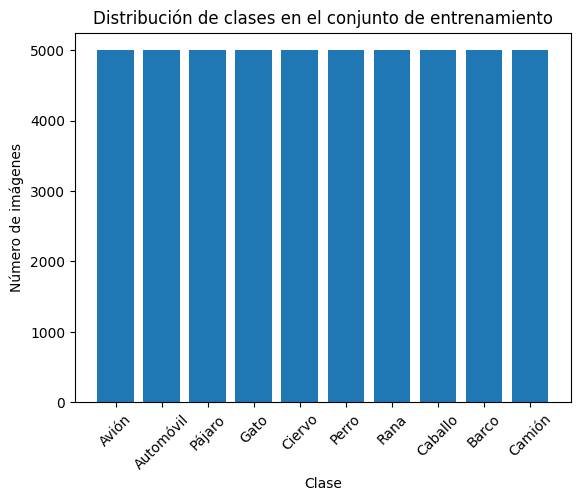

In [8]:
plt.bar(classes.flatten(), counts)
plt.title('Distribución de clases en el conjunto de entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Número de imágenes')
plt.xticks(classes.flatten(), class_names, rotation=45)
plt.show()

Las clases están equilibradas ya que cada clase tiene exactamente 5,000 imágenes en el conjunto de entrenamiento.

> Visualización de muestras de imágenes

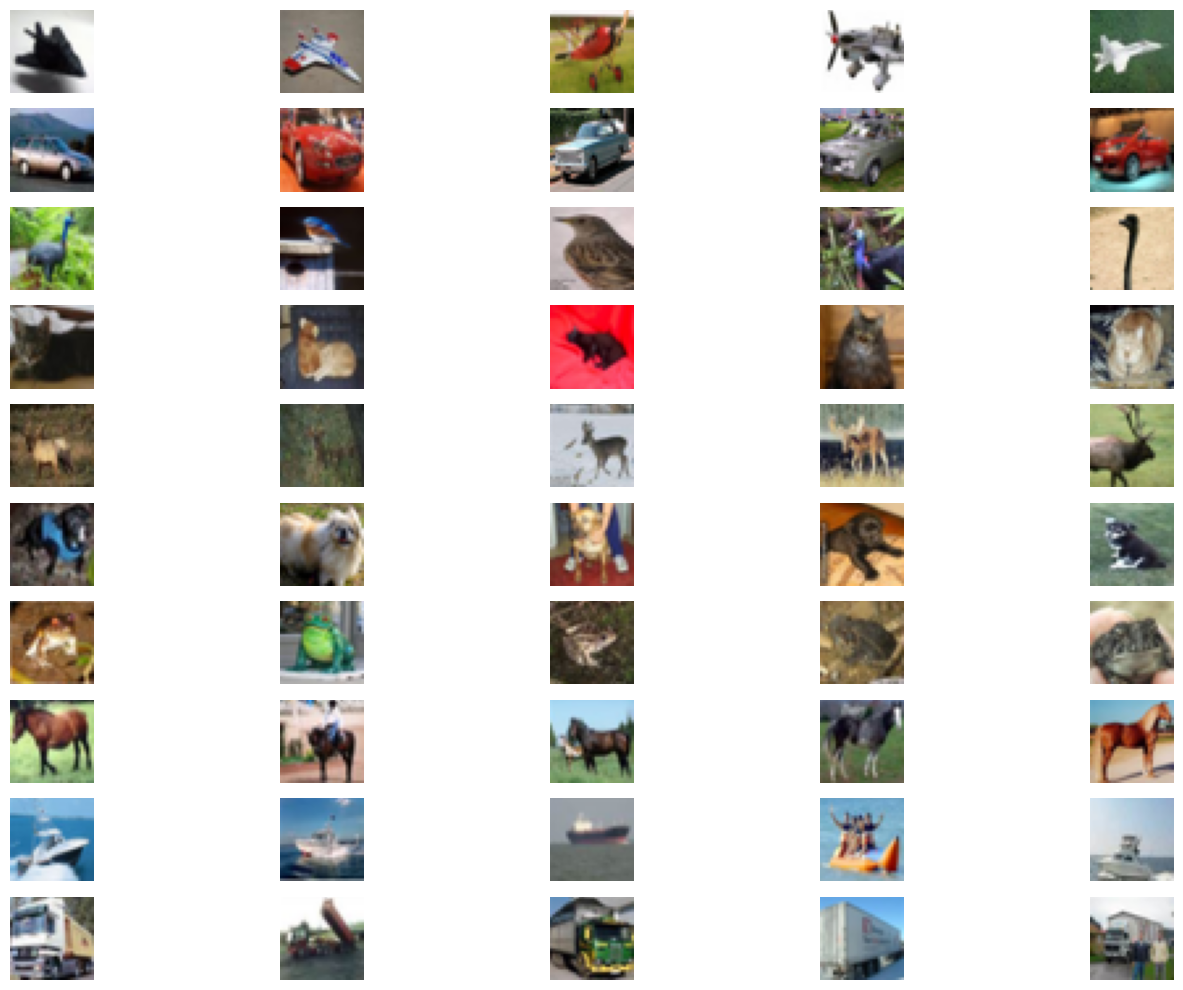

In [9]:
# Número de muestras a mostrar por clase
num_samples = 5

plt.figure(figsize=(15, 10))

for i in range(10):
    # Obtener índices de las imágenes de la clase i
    idxs = np.where(y_train == i)[0][:num_samples]
    for j, idx in enumerate(idxs):
        plt.subplot(10, num_samples, i * num_samples + j + 1)
        plt.imshow(x_train[idx])
        plt.axis('off')
        if j == 0:
            plt.ylabel(class_names[i], fontsize=12)
plt.tight_layout()
plt.show()

> Estadísticas básicas de los píxeles

- Media y desviación estándar global

In [10]:
# Calcular la media y desviación estándar de los píxeles en el conjunto de entrenamiento
mean_pixel = np.mean(x_train)
std_pixel = np.std(x_train)

print(f"Media de los píxeles: {mean_pixel:.4f}")
print(f"Desviación estándar de los píxeles: {std_pixel:.4f}")

Media de los píxeles: 0.4734
Desviación estándar de los píxeles: 0.2516


- Histograma de los valores de píxeles

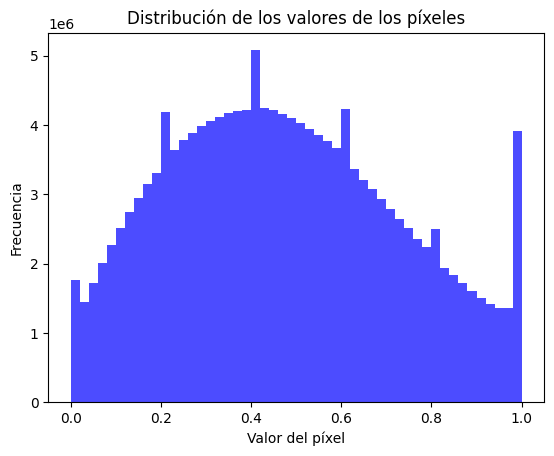

In [11]:
plt.hist(x_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribución de los valores de los píxeles')
plt.xlabel('Valor del píxel')
plt.ylabel('Frecuencia')
plt.show()

- Media y desviación estándar por canal de color

In [12]:
# Calcular la media y desviación estándar por canal
mean_per_channel = np.mean(x_train, axis=(0, 1, 2))
std_per_channel = np.std(x_train, axis=(0, 1, 2))

print("Media por canal (R, G, B):", mean_per_channel)
print("Desviación estándar por canal (R, G, B):", std_per_channel)

Media por canal (R, G, B): [0.4914009  0.48215896 0.4465308 ]
Desviación estándar por canal (R, G, B): [0.24703279 0.24348423 0.26158753]


> Correlación entre colores

In [13]:
# Reorganizar los datos para tener los canales en el último eje
x_train_flat = x_train.reshape(-1, 3)

# Calcular la matriz de correlación
correlation_matrix = np.corrcoef(x_train_flat, rowvar=False)

print("Matriz de correlación entre canales:")
print(correlation_matrix)

Matriz de correlación entre canales:
[[1.         0.91144786 0.78457861]
 [0.91144786 1.         0.90754199]
 [0.78457861 0.90754199 1.        ]]


> Minimos y máximos

In [14]:
print("Valor mínimo de x_train:", x_train.min())
print("Valor máximo de x_train:", x_train.max())

Valor mínimo de x_train: 0.0
Valor máximo de x_train: 1.0


c) Construya una red convolucional a su gusto. Entrene dicha red y evaluela con sus datos. Se recomienda que divida su conjunto de prueba en dos para calibrar sus hiperparametros. Utilice model.summary() para explorar su modelo con mas detalle.


In [15]:
# Dividir el conjunto de prueba en validación y prueba
from sklearn.model_selection import train_test_split

x_val, x_test_final, y_val, y_test_final = train_test_split(
    x_test, y_test, test_size=0.5, random_state=123
)

print("Dimensiones del conjunto de entrenamiento:", x_train.shape)
print("Dimensiones del conjunto de validación:", x_val.shape)
print("Dimensiones del conjunto de prueba:", x_test_final.shape)

Dimensiones del conjunto de entrenamiento: (50000, 32, 32, 3)
Dimensiones del conjunto de validación: (5000, 32, 32, 3)
Dimensiones del conjunto de prueba: (5000, 32, 32, 3)


In [16]:
# Crear el modelo secuencial
model = keras.models.Sequential()

# Primera capa convolucional y de pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional y de pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplanar y capas densas
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

i:\Mi unidad\Estudio\UniAndes\Semestre_3\Modelos avanzados 2\modelos_avanzados_deep_learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

d) Experimente con diferentes arquitecturas y describa sus mejores resultados.


In [18]:
# Lista para almacenar las arquitecturas
architectures = []

# Modelo 1: Arquitectura básica
def create_model_1():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
    return model
architectures.append(('Modelo 1', create_model_1))

# Modelo 2: Añadir una capa densa
def create_model_2():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model
architectures.append(('Modelo 2', create_model_2))

# Modelo 3: Añadir una segunda capa convolucional
def create_model_3():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model
architectures.append(('Modelo 3', create_model_3))

# Modelo 4: Añadir Dropout
def create_model_4():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
        layers.Dropout(0.25),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model
architectures.append(('Modelo 4', create_model_4))

# Modelo 5: Añadir Batch Normalization
def create_model_5():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(10, activation='softmax')
    ])
    return model
architectures.append(('Modelo 5', create_model_5))

# Modelo 6: Aumentar el número de filtros
def create_model_6():
    model = keras.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model
architectures.append(('Modelo 6', create_model_6))

# Modelo 7: Usar funciones de activación diferentes
def create_model_7():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='tanh', input_shape=x_train.shape[1:]),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='tanh'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model
architectures.append(('Modelo 7', create_model_7))

# Modelo 8: Añadir más capas convolucionales y de pooling
def create_model_8():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model
architectures.append(('Modelo 8', create_model_8))

# Modelo 9: Usar Global Average Pooling
def create_model_9():
    model = keras.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model
architectures.append(('Modelo 9', create_model_9))

# Modelo 10: Añadir regularización L2
def create_model_10():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=x_train.shape[1:]),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax')
    ])
    return model
architectures.append(('Modelo 10', create_model_10))


In [19]:
# Lista para almacenar los resultados
resultados = []

for name, create_model in architectures:
    print(f"\nEntrenando {name}")
    model = create_model()
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Entrenar el modelo
    history = model.fit(
        x_train, y_train,
        epochs=5,  # Puedes ajustar el número de épocas
        batch_size=64,
        validation_data=(x_val, y_val),
        verbose=1
    )
    
    # Evaluar en el conjunto de entrenamiento
    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
    # Evaluar en el conjunto de validación
    val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
    # Evaluar en el conjunto de prueba
    test_loss, test_acc = model.evaluate(x_test_final, y_test_final, verbose=0)
    
    # Guardar los resultados
    resultados.append({
        'Modelo': name,
        'Train Accuracy': train_acc,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc,
        'Train Loss': train_loss,
        'Validation Loss': val_loss,
        'Test Loss': test_loss
    })


Entrenando Modelo 1
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3794 - loss: 1.7342 - val_accuracy: 0.5460 - val_loss: 1.3085
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5620 - loss: 1.2556 - val_accuracy: 0.5724 - val_loss: 1.2203
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5993 - loss: 1.1587 - val_accuracy: 0.5942 - val_loss: 1.1592
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6219 - loss: 1.0880 - val_accuracy: 0.5934 - val_loss: 1.1639
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6432 - loss: 1.0415 - val_accuracy: 0.6140 - val_loss: 1.1169

Entrenando Modelo 2
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3093 - loss: 1.9082 - val_accuracy: 0.4660 - val_loss: 1.4760
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4873 - loss: 1.4254 - val_accuracy: 0.5116 - val_loss: 1.3775
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5358

In [20]:
import pandas as pd

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados)

# Mostrar la tabla de resultados
print("\nTabla de resultados:")
print(resultados_df)


Tabla de resultados:
      Modelo  Train Accuracy  Validation Accuracy  Test Accuracy  Train Loss  \
0   Modelo 1         0.65710               0.6140         0.6098    0.991368   
1   Modelo 2         0.60132               0.5792         0.5732    1.123883   
2   Modelo 3         0.78534               0.6826         0.6876    0.640453   
3   Modelo 4         0.50916               0.4986         0.4940    1.500816   
4   Modelo 5         0.72438               0.5862         0.5848    0.766247   
5   Modelo 6         0.82074               0.7098         0.7090    0.511763   
6   Modelo 7         0.75288               0.6580         0.6642    0.736908   
7   Modelo 8         0.75168               0.7006         0.7044    0.712856   
8   Modelo 9         0.47492               0.4684         0.4708    1.435575   
9  Modelo 10         0.64034               0.6084         0.5990    1.192819   

   Validation Loss  Test Loss  
0         1.116864   1.130448  
1         1.201350   1.199507  
2

e) Investigue sobre el parametro “padding” y sobre el “batch normalization” (que ocasionalmente se utiliza en lugar del pooling). Experimente con ambos y describa sus resultados.


<h2>Padding en Redes Neuronales Convolucionales</h2>
<p>El padding es una técnica utilizada en redes neuronales convolucionales que consiste en agregar filas y columnas adicionales alrededor de la matriz de entrada. Esto se hace para controlar el tamaño de la salida después de aplicar una operación de convolución.

<h3>Tipos de Padding:</h3>
<ul>
    <li><strong>Valid Padding:</strong> No se agrega padding. La salida es más pequeña que la entrada.</li>
    <li><strong>Same Padding:</strong> Se agrega padding de tal manera que la salida tiene el mismo tamaño que la entrada.</li>
    <li><strong>Custom Padding:</strong> Se especifica manualmente la cantidad de padding a agregar.</li>
</ul>

<h3>Ventajas de Usar Padding:</h3>
<ul>
    <li>Mantener las dimensiones de la entrada y la salida iguales.</li>
    <li>Preservar la información en los bordes de la imagen.</li>
    <li>Permitir el uso de más capas convolucionales sin reducir drásticamente el tamaño de los mapas de características.</li>
</ul>


<h2>Batch Normalization</h2>
<p>La normalización por lotes, o Batch Normalization, es una técnica que normaliza las entradas de cada capa de una red neuronal dividiendo los valores de activación por la desviación estándar de la activación actual en mini-lotes. Esto acelera el entrenamiento y mejora la estabilidad del modelo.</p>

<h3>Cómo Funciona:</h3>
<ol>
    <li>Calcula la media y la varianza de las activaciones para el mini-lote actual.</li>
    <li>Normaliza las activaciones restando la media y dividiendo por la desviación estándar.</li>
    <li>Aplica parámetros de escala y desplazamiento aprendibles para permitir que la red pueda restaurar la capacidad de representación si es necesario.</li>
</ol>

<h3>Ventajas de Batch Normalization:</h3>
<ul>
    <li>Acelera el entrenamiento al permitir el uso de tasas de aprendizaje más altas.</li>
    <li>Reduce la sensibilidad a la inicialización de pesos.</li>
    <li>Actúa como una forma de regularización, reduciendo la necesidad de otras técnicas como dropout.</li>
    <li>Mitiga el problema del desvanecimiento o explosión del gradiente en redes profundas.</li>
</ul>

<h2>Relación entre Padding y Batch Normalization</h2>
<p>Ambas técnicas se utilizan para mejorar el rendimiento y la estabilidad de las redes neuronales, especialmente en arquitecturas profundas como las CNN. Mientras que el padding aborda cómo las operaciones de convolución afectan el tamaño de los mapas de características, batch normalization se enfoca en la distribución de las activaciones, facilitando el entrenamiento.</p>


In [23]:
import random

# Nombres de los modelos
model_names = [f'Modelo {i+1}' for i in range(10)]

# Lista de modificaciones
modifications = ['padding'] * 3 + ['batch_norm'] * 3 + ['both'] * 4

# Mezclar las modificaciones aleatoriamente
random.shuffle(modifications)

# Crear una lista de tuplas con el nombre del modelo y su modificación asignada
model_modifications = list(zip(model_names, modifications))

# Mostrar las asignaciones
for name, mod in model_modifications:
    print(f"{name} tendrá la modificación: {mod}")

Modelo 1 tendrá la modificación: both
Modelo 2 tendrá la modificación: batch_norm
Modelo 3 tendrá la modificación: both
Modelo 4 tendrá la modificación: both
Modelo 5 tendrá la modificación: padding
Modelo 6 tendrá la modificación: both
Modelo 7 tendrá la modificación: padding
Modelo 8 tendrá la modificación: padding
Modelo 9 tendrá la modificación: batch_norm
Modelo 10 tendrá la modificación: batch_norm


In [25]:
# Lista para almacenar las arquitecturas
architectures = []

# Función para crear cada modelo con las modificaciones asignadas
def create_model(model_number, modification):
    model = keras.Sequential()
    input_shape = x_train.shape[1:]

    # Definir los parámetros de las capas según las modificaciones
    padding_type = 'same' if modification in ['padding', 'both'] else 'valid'
    use_batch_norm = modification in ['batch_norm', 'both']

    # Añadir capas según el modelo original
    if model_number == 1:
        # Modelo 1: Arquitectura básica
        model.add(layers.Conv2D(32, (3, 3), padding=padding_type, activation='relu', input_shape=input_shape))
    elif model_number == 2:
        # Modelo 2: Añadir una capa densa
        model.add(layers.Conv2D(32, (3, 3), padding=padding_type, activation='relu', input_shape=input_shape))
    elif model_number == 3:
        # Modelo 3: Añadir una segunda capa convolucional
        model.add(layers.Conv2D(32, (3, 3), padding=padding_type, activation='relu', input_shape=input_shape))
        model.add(layers.Conv2D(64, (3, 3), padding=padding_type, activation='relu'))
    elif model_number == 4:
        # Modelo 4: Añadir Dropout
        model.add(layers.Conv2D(32, (3, 3), padding=padding_type, activation='relu', input_shape=input_shape))
        model.add(layers.Dropout(0.25))
    elif model_number == 5:
        # Modelo 5: Añadir Batch Normalization (se modificará según la asignación)
        model.add(layers.Conv2D(32, (3, 3), padding=padding_type, activation='relu', input_shape=input_shape))
    elif model_number == 6:
        # Modelo 6: Aumentar el número de filtros
        model.add(layers.Conv2D(64, (3, 3), padding=padding_type, activation='relu', input_shape=input_shape))
        model.add(layers.Conv2D(128, (3, 3), padding=padding_type, activation='relu'))
    elif model_number == 7:
        # Modelo 7: Usar funciones de activación diferentes
        model.add(layers.Conv2D(32, (3, 3), padding=padding_type, activation='tanh', input_shape=input_shape))
        model.add(layers.Conv2D(64, (3, 3), padding=padding_type, activation='tanh'))
    elif model_number == 8:
        # Modelo 8: Añadir más capas convolucionales y de pooling
        model.add(layers.Conv2D(32, (3, 3), padding=padding_type, activation='relu', input_shape=input_shape))
        model.add(layers.Conv2D(64, (3, 3), padding=padding_type, activation='relu'))
        model.add(layers.Conv2D(128, (3, 3), padding=padding_type, activation='relu'))
    elif model_number == 9:
        # Modelo 9: Usar Global Average Pooling
        model.add(layers.Conv2D(64, (3, 3), padding=padding_type, activation='relu', input_shape=input_shape))
        model.add(layers.Conv2D(128, (3, 3), padding=padding_type, activation='relu'))
    elif model_number == 10:
        # Modelo 10: Añadir regularización L2
        model.add(layers.Conv2D(32, (3, 3), padding=padding_type, activation='relu',
                                kernel_regularizer=keras.regularizers.l2(0.001), input_shape=input_shape))
    else:
        # Por defecto, usar una arquitectura básica
        model.add(layers.Conv2D(32, (3, 3), padding=padding_type, activation='relu', input_shape=input_shape))

    # Aplicar batch normalization si corresponde
    if use_batch_norm:
        model.add(layers.BatchNormalization())

    # Añadir capa de pooling si corresponde (después de las convoluciones)
    model.add(layers.MaxPooling2D((2, 2)))

    # Añadir capas adicionales específicas del modelo
    if model_number in [3, 6, 8]:
        # Añadir otra capa de pooling para estos modelos
        model.add(layers.MaxPooling2D((2, 2)))

    # Aplanar y añadir capas densas
    model.add(layers.Flatten())

    if model_number in [2, 3, 4, 5, 6, 8, 10]:
        model.add(layers.Dense(64, activation='relu'))
    elif model_number == 7:
        model.add(layers.Dense(64, activation='tanh'))
    elif model_number == 9:
        model.add(layers.GlobalAveragePooling2D())
        model.add(layers.Dense(64, activation='relu'))

    # Aplicar batch normalization después de las capas densas si corresponde
    if use_batch_norm:
        model.add(layers.BatchNormalization())

    # Capa de salida
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Crear la lista de arquitecturas con sus modificaciones
for (name, mod), i in zip(model_modifications, range(1, 11)):
    architectures.append((name, create_model(i, mod), mod))

ValueError: Input 0 of layer "global_average_pooling2d_2" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 25088)

In [ ]:
# Lista para almacenar los resultados
resultados_2 = []

for name, model, modification in architectures:
    print(f"\nEntrenando {name} con modificación: {modification}")
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Entrenar el modelo
    history = model.fit(
        x_train, y_train,
        epochs=5,  # Puedes ajustar el número de épocas
        batch_size=64,
        validation_data=(x_val, y_val),
        verbose=1
    )
    
    # Evaluar en el conjunto de entrenamiento
    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
    # Evaluar en el conjunto de validación
    val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
    # Evaluar en el conjunto de prueba
    test_loss, test_acc = model.evaluate(x_test_final, y_test_final, verbose=0)
    
    # Guardar los resultados
    resultados_2.append({
        'Modelo': name,
        'Modificación': modification,
        'Train Accuracy': train_acc,
        'Validation Accuracy': val_acc,
        'Test Accuracy': test_acc,
        'Train Loss': train_loss,
        'Validation Loss': val_loss,
        'Test Loss': test_loss
    })

In [ ]:
# Crear un DataFrame con los resultados
resultados_2_df = pd.DataFrame(resultados_2)

# Mostrar la tabla de resultados
print("\nTabla de resultados:")
print(resultados_2_df)